<a href="https://colab.research.google.com/github/PDeySarkar103/ML_Astrophysics/blob/main/103__DISSERTATION_SDSS_Classification_using_ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Datasets

In [3]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 24.8 MB/s eta 0:00:00


In [4]:
from astroquery.sdss import SDSS

query = """SELECT TOP 500000
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
 p.run, p.rerun, p.camcol, p.field,
s.specobjid, s.class, s.z as redshift,
s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
res = SDSS.query_sql(query, data_release=17)
df = res.to_pandas()
df.to_csv('SDSS17.csv')

In [5]:
#from google.colab import files
#uploaded=files.upload()

In [6]:
#df=pd.read_csv('SDSS_DR18.csv')

In [7]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237660961326039689,131.958969,30.402035,23.02586,20.51286,18.73727,18.04639,17.59884,3606,301,2,53,1.429916e+18,b'GALAXY',0.339031,1270,52991,83
1,1237660961324335581,128.219945,28.077597,22.76285,21.47941,19.98232,19.05719,18.49430,3606,301,2,27,5.016157e+18,b'GALAXY',0.534658,4455,55539,993
2,1237660961324990699,129.577717,29.045400,25.40071,21.92014,19.56422,18.92485,18.56440,3606,301,2,37,5.014978e+18,b'GALAXY',0.466485,4454,55536,800
3,1237660961325974129,131.709338,30.334135,24.22865,22.71454,21.93600,21.45873,22.14235,3606,301,2,52,1.174669e+19,b'GALAXY',0.981870,10433,58132,643
4,1237660961327022441,134.072729,31.599290,24.19589,23.04204,22.35382,21.65938,22.03173,3606,301,2,68,1.174773e+19,b'GALAXY',0.777908,10434,58140,314


In [8]:
df.shape

(500000, 18)

# EDA(Exploratory Data Analysis)

In [9]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  float64
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(9), int64(8), object(1)
memory usage: 68.7+ MB


In [11]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237665e+18,173.693538,24.430743,21.483574,20.034341,19.208028,18.578109,18.196514,4497.105730,301.0,3.225772,183.936990,5.741413e+18,0.573847,5099.291496,55574.975348,440.007144
std,8.548266e+12,95.848520,19.760582,77.653855,76.332495,63.389205,67.966743,72.258322,1990.299593,0.0,1.615371,140.072025,3.286078e+18,0.725669,2918.606099,1799.397532,273.488690
min,1.237646e+18,0.000095,-18.865961,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.010932,266.000000,51608.000000,1.000000
25%,1.237658e+18,126.763335,6.458631,20.322070,18.904677,18.048347,17.644393,17.381095,2986.000000,301.0,2.000000,83.000000,2.862062e+18,0.066321,2542.000000,54259.000000,209.000000
50%,1.237664e+18,173.423742,23.274478,22.183875,21.090490,20.102890,19.379370,18.975680,4263.000000,301.0,3.000000,148.000000,5.616246e+18,0.425468,4988.000000,55882.000000,417.000000
75%,1.237670e+18,229.773797,40.002402,23.709415,22.123883,21.008220,20.331402,19.869833,5598.000000,301.0,5.000000,246.000000,8.192141e+18,0.688346,7276.000000,56713.000000,639.000000
max,1.237681e+18,359.999810,84.490494,32.781390,31.602240,31.990100,32.141470,29.514250,8162.000000,301.0,6.000000,1000.000000,1.412694e+19,7.051930,12547.000000,58932.000000,1000.000000


In [12]:
df['class'].nunique() # Shows no. of unique entries in the class column

3

In [13]:
df['class'].unique() # The unique elements in class column

array([b'GALAXY', b'QSO', b'STAR'], dtype=object)

In [14]:
df['class'].value_counts()

b'GALAXY'    305672
b'STAR'      101479
b'QSO'        92849
Name: class, dtype: int64

# Visualization of Data

In [15]:
sns.set(style='darkgrid',palette='dark')

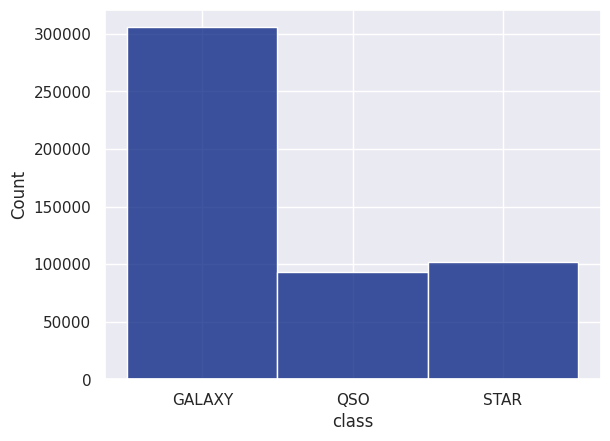

In [16]:
sns.histplot(x=df['class'])
plt.show()

<Axes: >

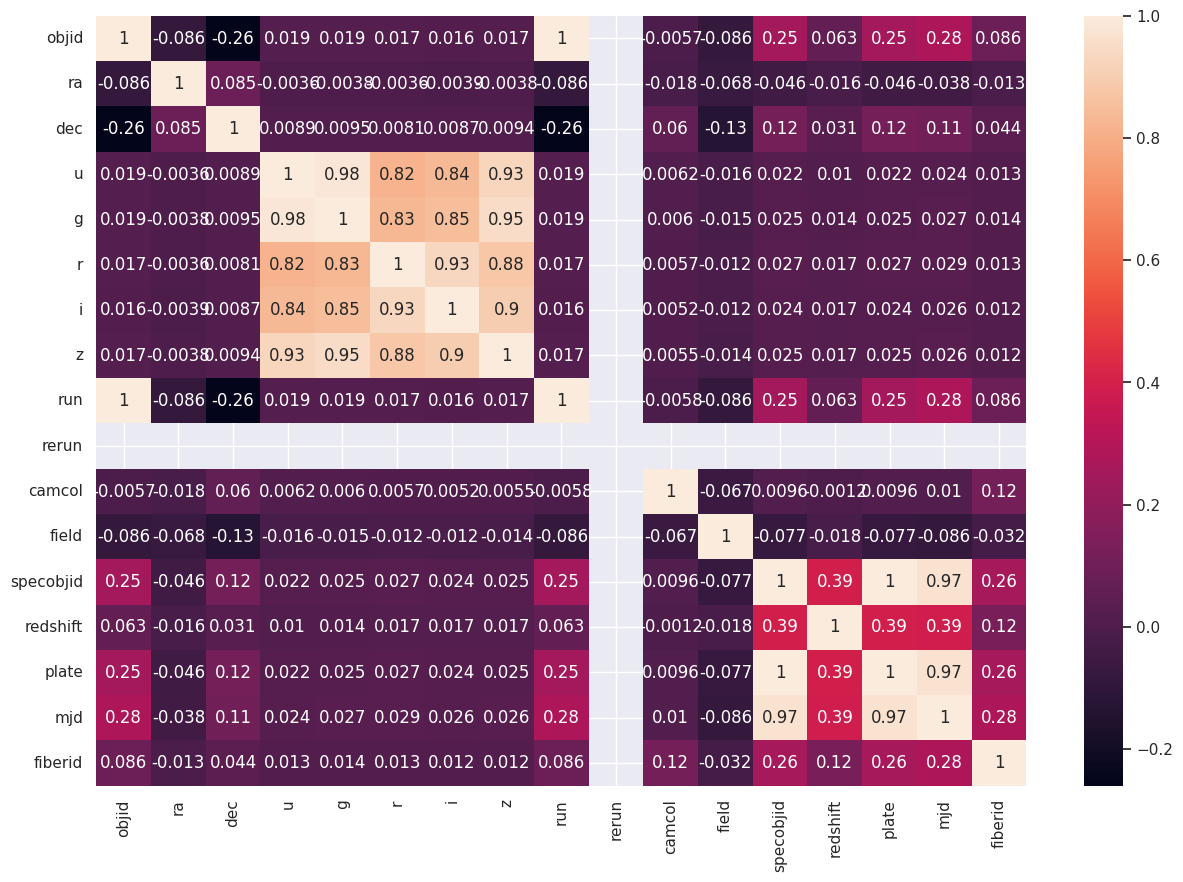

In [17]:
# Heatmap for expressing correlation

plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

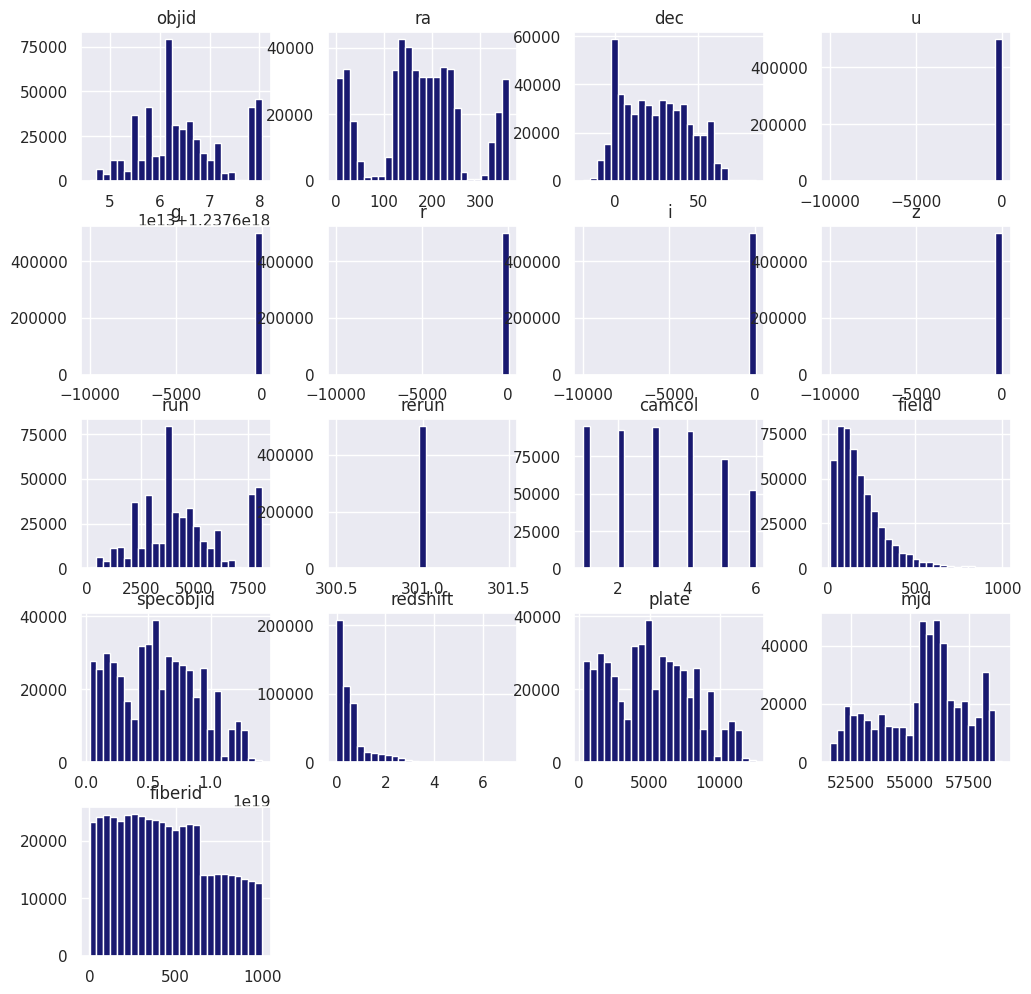

In [18]:
df.hist(bins=25,figsize=(12,12),color='midnightblue')
plt.show()

# Feature Selection

In [19]:
X=df[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,23.02586,20.51286,18.73727,18.04639,17.59884,0.339031,1270
1,22.76285,21.47941,19.98232,19.05719,18.49430,0.534658,4455
2,25.40071,21.92014,19.56422,18.92485,18.56440,0.466485,4454
3,24.22865,22.71454,21.93600,21.45873,22.14235,0.981870,10433
4,24.19589,23.04204,22.35382,21.65938,22.03173,0.777908,10434
...,...,...,...,...,...,...,...
499995,18.26241,16.74280,15.98275,15.60460,15.33807,0.102906,909
499996,24.69182,22.81512,21.72421,20.63044,19.73668,0.835476,8173
499997,21.18259,19.37793,18.41409,17.97455,17.67062,0.103423,8236
499998,24.07570,21.97067,20.67923,19.76537,19.14814,0.524557,7100


In [20]:
Y=df['class']
Y

0         b'GALAXY'
1         b'GALAXY'
2         b'GALAXY'
3         b'GALAXY'
4         b'GALAXY'
            ...    
499995    b'GALAXY'
499996    b'GALAXY'
499997    b'GALAXY'
499998    b'GALAXY'
499999    b'GALAXY'
Name: class, Length: 500000, dtype: object

# Encoding

In [21]:
#encoder={'GALAXY':1,'STAR':0,'QSO':2}
#df['class']=df['class'].map(encoder)

In [22]:
#df['class'].value_counts()

In [23]:
# We can also use scikit learn for this
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y=LE.fit_transform(Y)

In [24]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# GALAXY= 0
# QSO   = 1
# STAR  = 2

In [26]:
df['class'].value_counts()

b'GALAXY'    305672
b'STAR'      101479
b'QSO'        92849
Name: class, dtype: int64

# Resampling

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, Y_res = sm.fit_resample(X, Y)

In [28]:
#Y_res.value_counts()

# Splitting Datasets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res,Y_res,test_size=0.25,random_state=30)

In [30]:
X_train

,u,g,r,i,z,redshift,plate
364747,19.937250,17.996340,16.918930,16.477630,16.116440,0.132085,4306
756622,20.370868,19.353267,18.920422,18.756300,18.696624,-0.000313,1500
54579,21.858620,21.692720,21.575080,21.269610,21.049030,0.963775,10657
153396,21.212440,18.882940,17.629430,17.148890,16.795430,0.181920,2744
864829,20.480437,19.722197,19.452788,19.357091,19.333970,0.000481,2868
...,...,...,...,...,...,...,...
328599,21.827190,21.438550,21.421940,21.476800,20.792630,2.352759,6593
570508,21.266508,21.034018,20.730398,20.645189,20.506379,1.128660,8385
885236,22.922930,20.375867,19.401291,19.048228,18.787872,-0.000286,1475
572333,24.655081,22.139584,21.812943,21.879574,22.057143,0.867990,5111


In [31]:
y_train

array([0, 2, 0, ..., 2, 1, 0])

# Classification Algorithms

In [32]:
# Creating a dataframe to store the accuracy scores of all the classification algorithms so that we are able to choose the best one

score_df=pd.DataFrame(columns=['Algorithm','Recall_Score'])

## Logistic Regression

In [33]:
# Training the ML model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred1=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

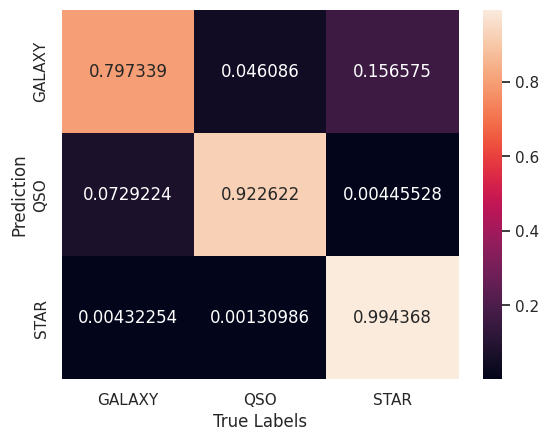

In [34]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred1,normalize='true')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [35]:
# Getting the Recall score

from sklearn.metrics import recall_score
LR_score=recall_score(y_test,y_pred1,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Logistic Regression','Recall_Score':LR_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.904656


## Decision Tree

In [36]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini',random_state=30)
model.fit(X_train,y_train)

y_pred2=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

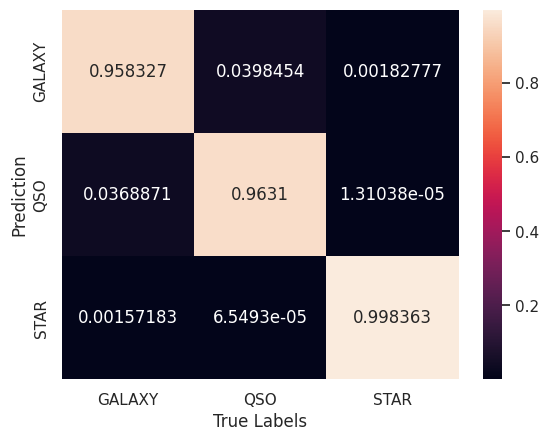

In [37]:
# Generating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred2,normalize='true')

sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [38]:
# Getting the Recall score

from sklearn.metrics import recall_score
dt_score=recall_score(y_test,y_pred2,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Decision Tree','Recall_Score':dt_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.904656
1,Decision Tree,0.973248


## Random Forest

In [39]:
# First, we'll create a dataframe where we'll store recall score of random forest algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score

rf_df=pd.DataFrame(columns=['Estimators','Recall score'])

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=30)
  model.fit(X_train,y_train)
  y_pred3=model.predict(X_test)
  rf_df=rf_df.append({'Estimators':i,'Recall score':recall_score(y_test,y_pred3,average='weighted')},ignore_index=True)


In [41]:
rf_df

,Estimators,Recall score
0,1.0,0.968472
1,2.0,0.970936
2,3.0,0.978443
3,4.0,0.979595
4,5.0,0.980777
5,6.0,0.981318
6,7.0,0.981667
7,8.0,0.981750
8,9.0,0.982072
9,10.0,0.982334


In [42]:
# Sorting

rf_df=rf_df.sort_values(by='Recall score',ascending=False)
rf_df.head()

,Estimators,Recall score
28,29.0,0.983224
24,25.0,0.983211
25,26.0,0.983202
26,27.0,0.983176
29,30.0,0.983163


The above table shows that the recall score is highest for n=29.0. So we'll keep n_estimators=29.0

In [43]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=29,random_state=30)
model.fit(X_train,y_train)
y_pred3=model.predict(X_test)

from sklearn.metrics import recall_score
rf_score=recall_score(y_test,y_pred3,average='weighted')
rf_score

0.9832238477845534

In [44]:
# Adding accuracy to the data frame
score_df=score_df.append({'Algorithm':'Random Forest','Recall_Score':rf_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.904656
1,Decision Tree,0.973248
2,Random Forest,0.983224


Text(46.25, 0.5, 'Prediction')

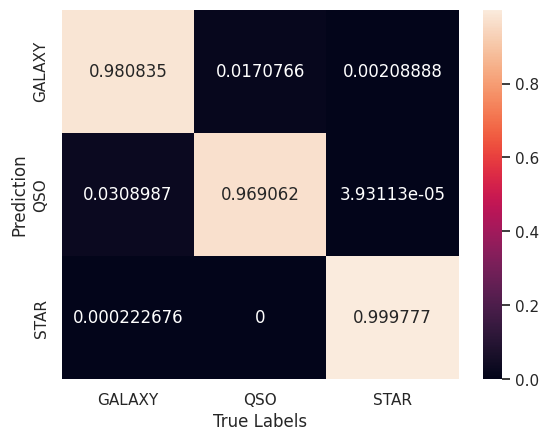

In [45]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix

cm_rf=confusion_matrix(y_test,y_pred3,normalize='true')

sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## KNN

In [46]:
# We'll create a dataframe to store recall score of K Neighbour Classifiers with different n_neighbour values.
# From there, we shall choose the maximum one and consider that as recall score for KNN algo.

knn_df=pd.DataFrame(columns=['Neighbors','Recall Score'])

In [47]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred4=model.predict(X_test)
  knn_df=knn_df.append({'Neighbors':i,'Recall Score':recall_score(y_test,y_pred4,average='weighted')},ignore_index=True)

knn_df

,Neighbors,Recall Score
0,1.0,0.949488
1,2.0,0.936123
2,3.0,0.937816
3,4.0,0.931107
4,5.0,0.929489
5,6.0,0.924996
6,7.0,0.924145
7,8.0,0.919919
8,9.0,0.918832
9,10.0,0.915177


In [48]:
knn_df=knn_df.sort_values(by='Recall Score',ascending=False)
knn_df.head()

,Neighbors,Recall Score
0,1.0,0.949488
2,3.0,0.937816
1,2.0,0.936123
3,4.0,0.931107
4,5.0,0.929489


Here, we see the recall score is maximum for n=3.0 Hence, we will choose n=3.0

In [49]:
# KNN algo for n_neighbors=3.0

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)

from sklearn.metrics import recall_score
knn_score=recall_score(y_test,y_pred4,average='weighted')
print(knn_score)

0.9378156978722291


In [50]:
score_df=score_df.append({'Algorithm':'KNN','Recall_Score':knn_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.904656
1,Decision Tree,0.973248
2,Random Forest,0.983224
3,KNN,0.937816


Text(46.25, 0.5, 'Prediction')

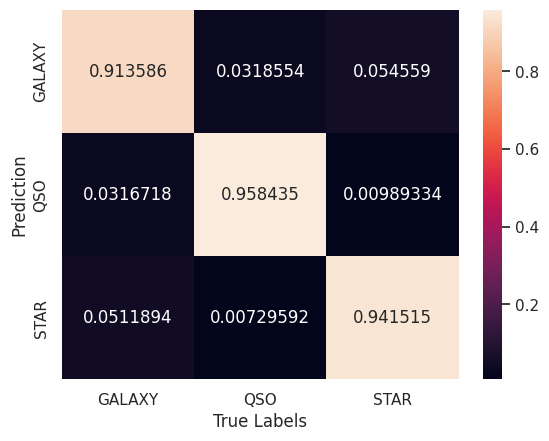

In [51]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_knn=confusion_matrix(y_test,y_pred4,normalize='true')

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## SVM

# Neural Networks

## Artificial Neural Network(ANN)

First, we shall do th feature selection again

### Feature Selection

In [52]:
Xr=df[['u','g','r','i','z','redshift','plate']]
yr=df['class']

Here, we need to reencode the class as follows.

### Re-encode

In [53]:
from keras.utils import to_categorical
l_encode=LabelEncoder()
l_encode.fit(yr)
Yr=l_encode.transform(yr)
Yr=to_categorical(Yr)

Resampling the data

## Resampling the data

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_r, Y_r = sm.fit_resample(Xr, Yr)

Now, we shall split to training and testing data set

### Splitting to training and testing data set

In [55]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_r,Y_r,test_size=0.25,random_state=210)

In [56]:
Xr_train.shape,Xr_test.shape,yr_train.shape,yr_test.shape

((687762, 7), (229254, 7), (687762, 3), (229254, 3))

Now, we shall make the model. For that we have to import th following

### Making the model

In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Now, we shall start with the model.

In [58]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=Xr_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(48,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    ])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 48)                6192      
                                                                 
 dense_2 (Dense)             (None, 3)                 147       
                                                                 
Total params: 7363 (28.76 KB)
Trainable params: 7363 (28.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xr_train,yr_train,validation_data=(Xr_test,yr_test),epochs=40,verbose=0)

<Axes: >

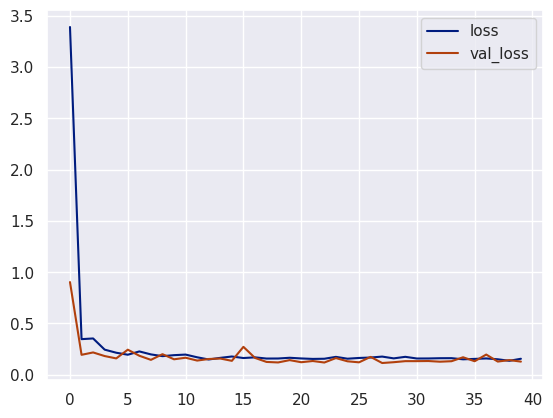

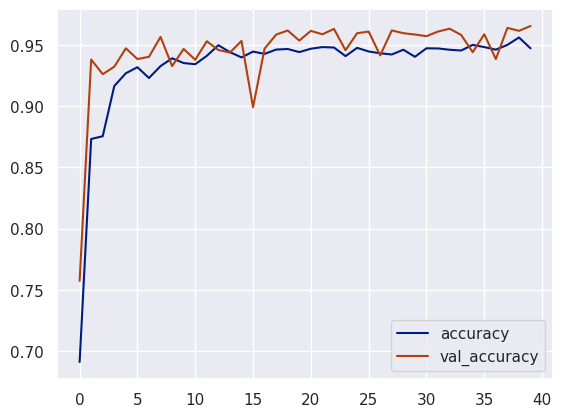

In [61]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the model's accuracy

In [62]:
y_pred6=np.round(model.predict(Xr_test))

7165/7165 [==============================] - 12s 2ms/step


In [63]:
y_pred6

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [64]:
from sklearn.metrics import recall_score

ann_score=recall_score(yr_test,y_pred6,average='weighted')
ann_score

0.965392097847802

In [65]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':ann_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.904656
1,Decision Tree,0.973248
2,Random Forest,0.983224
3,KNN,0.937816
4,ANN,0.965392


In [66]:
score_df.sort_values(by='Recall_Score')
score_df.head()

,Algorithm,Recall_Score
0,Logistic Regression,0.904656
1,Decision Tree,0.973248
2,Random Forest,0.983224
3,KNN,0.937816
4,ANN,0.965392


In [67]:
y_pred6.shape

(229254, 3)

In [68]:
yr_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [69]:
#confusion_matrix(preds2.argmax(axis = 1), yr_test.argmax(axis = 1))

#plt.figure(figsize = (6,6))
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(yr_test.argmax(axis = 1), y_pred6.argmax(axis = 1), display_labels = ['GALAXY', 'QUASAR', 'STAR'])

Text(46.25, 0.5, 'Prediction')

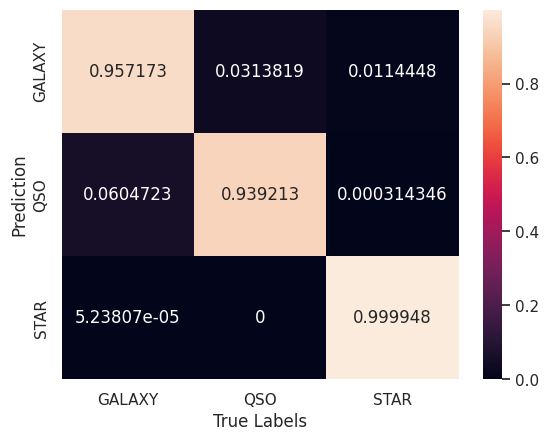

In [70]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(yr_test.argmax(axis=1),y_pred6.argmax(axis=1),normalize='true')

sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Comparing all the algorithms

Text(153.75, 0.5, 'Prediction')

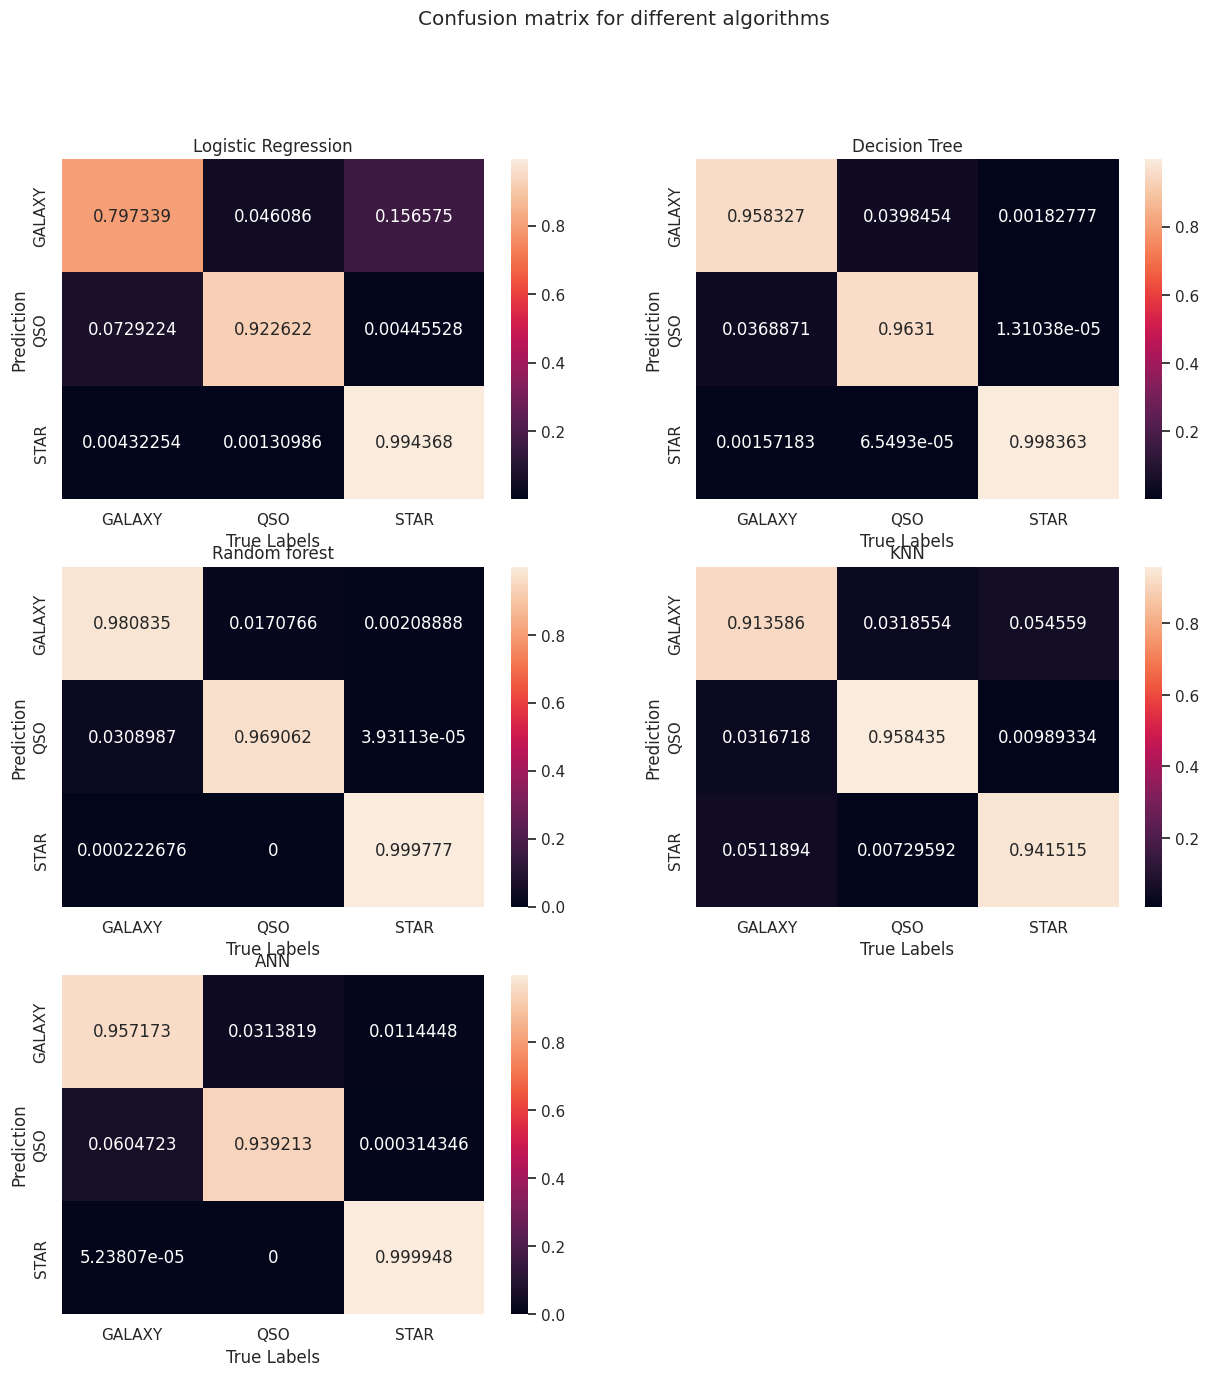

In [71]:
plt.figure(figsize=(15,15))
plt.suptitle('Confusion matrix for different algorithms')

plt.subplot(321)
plt.title('Logistic Regression')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(322)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(323)
plt.title('Random forest')
sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(324)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(325)
plt.title('ANN')
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')